<a href="https://colab.research.google.com/github/LaVita337/AIFFEL_Workplace/blob/main/DLthon/DLthon_teamProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 라이브러리 불러오기

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from PIL import Image

# 2. 파라미터 기본값 설정

In [ ]:
# 데이터 파라미터 기본값

batch_size = 32
epochs = 50

# 3. Cifar 10 데이터셋 로드 & 분할

In [ ]:
# 훈련 이미지와 테스트 이미지 분할
# 데이터 분할을 통해 향후 훈련용으로 쓸 것과 테스트용으로 쓸 것을 구분

# 데이터 불러오기
(train_images, train_label), (val_images, val_label) = cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


# 4. 분할한 데이터 크기 확인

In [ ]:
print(train_label.shape,val_label.shape)

(50000, 1) (10000, 1)


# 5.범주형 데이터 원핫인코딩

In [ ]:
# 2. 데이터 전처리
# 이미지 데이터의 경우 실수 형태로 변경한 뒤 255로 나누어 0과 1사이의 값으로 만들어 모델이 학습하기 좋게 만듬
# 범주형 데이터를 띄고 있는 라벨 데이터의 경우 정수를 1 값으로 변경하여 각 범주가 독립적으로 있을 수 있도록 표현하여 모델 학습에 도움을 줌

# train_images = train_images.astype('float32') / 255.0
# val_images = val_images.astype('float32') / 255.0
train_label = tf.keras.utils.to_categorical(train_label, 10)
val_label = tf.keras.utils.to_categorical(val_label, 10)

# Check the shapes
print(train_images.shape, train_label.shape)
print(val_images.shape, val_label.shape)

(50000, 32, 32, 3) (50000, 10)
(10000, 32, 32, 3) (10000, 10)


# 6. 이미지 업스케일링 & 정규화

In [ ]:
# 이미지 업스케일링 적용
def upscale_and_normalize(img, target_size=(64, 64)):
    """
    Upscale an image using bicubic interpolation and then normalize it.
    """
    upscaled_img = img.resize(target_size, Image.BICUBIC)
    return np.array(upscaled_img) / 255.0

# Upscale and normalize for 64x64 images
train_images_upscaled = np.array([upscale_and_normalize(Image.fromarray(img.astype(np.uint8)), (64, 64)) for img in train_images])
val_images_upscaled = np.array([upscale_and_normalize(Image.fromarray(img.astype(np.uint8)), (64, 64)) for img in val_images])

In [ ]:
def simple_upscale(img, target_size=(128, 128)):
    """
    Simply upscale an image using bicubic interpolation without any normalization.
    """
    upscaled_img = img.resize(target_size, Image.BICUBIC)
    return np.array(upscaled_img) / 255.0

# Upscale and normalize for 128x128 images
train_images_upscaled_v2 = np.array([upscale_and_normalize(Image.fromarray(img.astype(np.uint8)), (128, 128)) for img in train_images])
val_images_upscaled_v2 = np.array([upscale_and_normalize(Image.fromarray(img.astype(np.uint8)), (128, 128)) for img in val_images])

# 7. 전처리 후 데이터 크기 확인

In [ ]:
# 각 그룹의 데이터 크기 확인

print(train_images.shape, train_label.shape)
print(val_images.shape, val_label.shape)
print(train_images_upscaled.shape, train_label.shape)
print(val_images_upscaled.shape, val_label.shape)
print(train_images_upscaled_v2.shape, train_label.shape)
print(val_images_upscaled_v2.shape, val_label.shape)

(50000, 32, 32, 3) (50000, 10)
(10000, 32, 32, 3) (10000, 10)
(50000, 64, 64, 3) (50000, 10)
(10000, 64, 64, 3) (10000, 10)
(50000, 128, 128, 3) (50000, 10)
(10000, 128, 128, 3) (10000, 10)


# 8. 클래스별 이름 리스트화

In [ ]:
# CIFAR-10 클래스 이름

class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# 9. 클래스 별 이미지 데이터 수 시각화

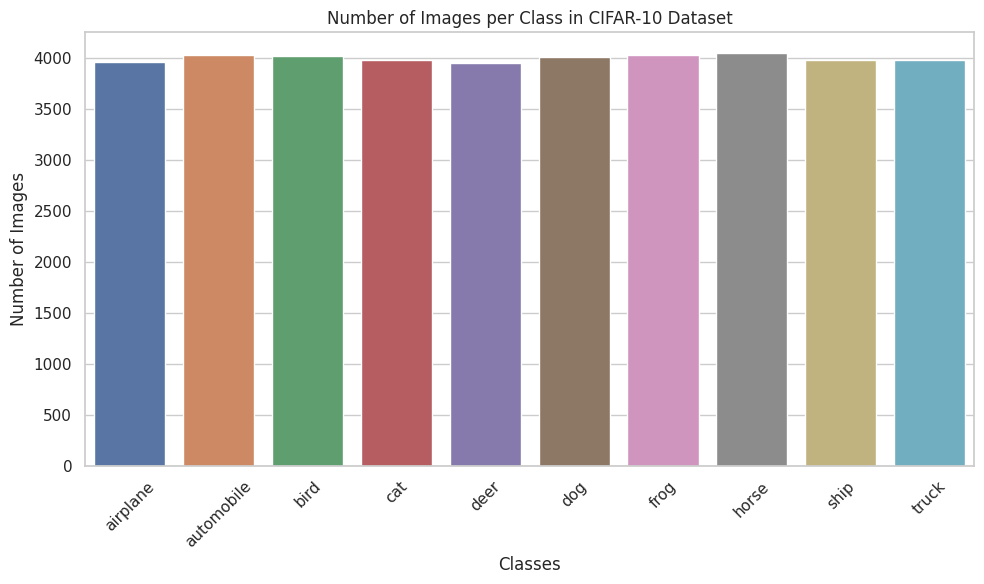

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 클래스 이름 리스트
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# 클래스 별 이미지 수 데이터
class_counts = {
0: 3964,
1: 4029,
2: 4021,
3: 3983,
4: 3954,
5: 4007,
6: 4030,
7: 4050,
8: 3978,
9: 3984
}

# seaborn 스타일 설정
sns.set(style="whitegrid")

# 바플롯 생성
plt.figure(figsize=(10, 6))
sns.barplot(x=class_names, y=[class_counts[i] for i in range(len(class_names))])
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.title("Number of Images per Class in CIFAR-10 Dataset")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 10. 이미지 크기별 레이블 매핑 시각화

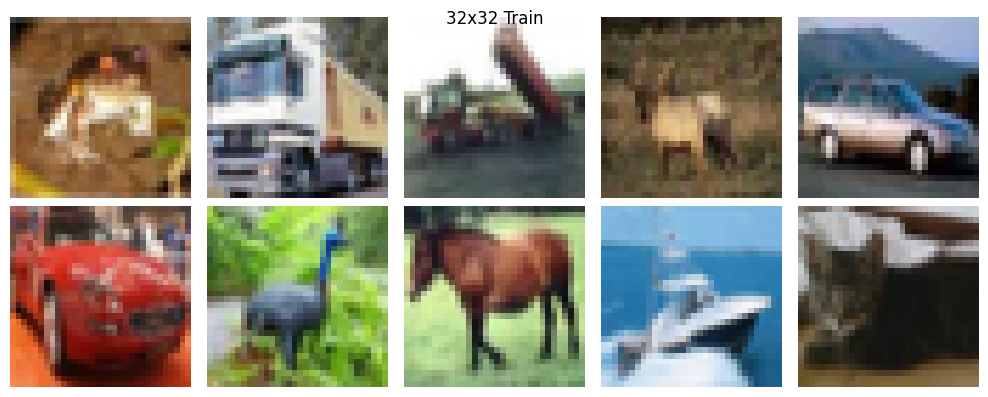

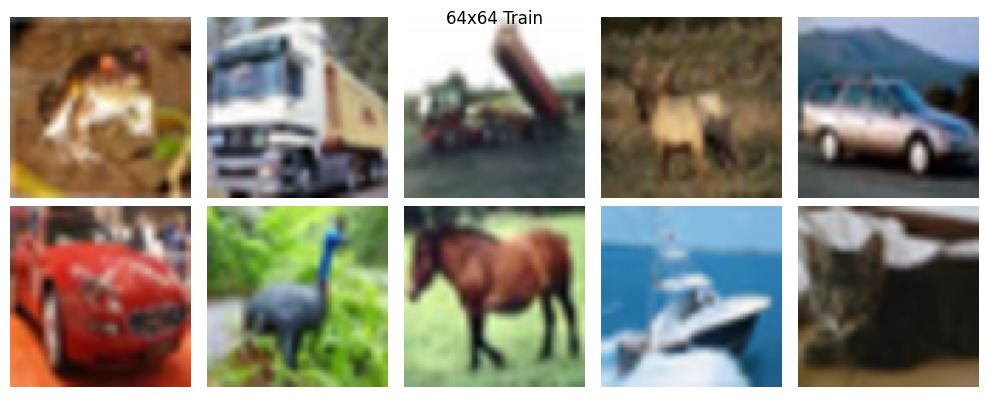

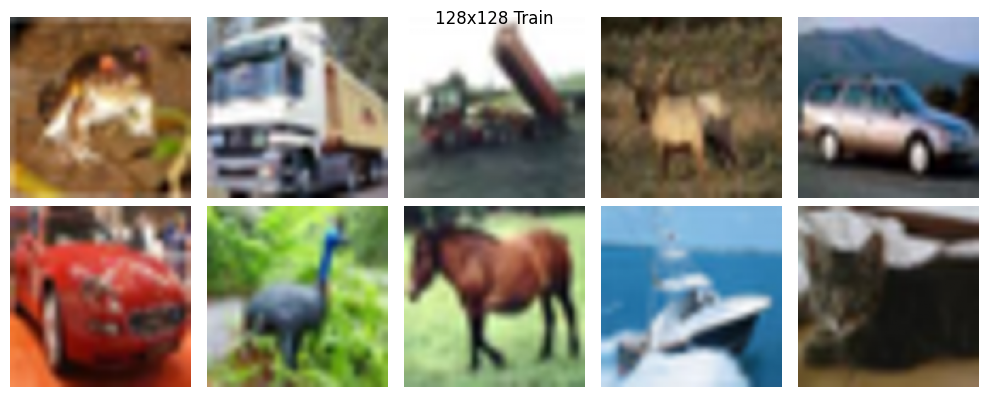

In [ ]:
# Updated data samples without labels
datasets_without_labels = {
    "32x32 Train": train_images,  # Replace with actual variable name for 32x32 train images
    "64x64 Train": train_images_upscaled,  # Placeholder variable name
    "128x128 Train": train_images_upscaled_v2,  # Placeholder variable name
}

def visualize_images_corrected_with_clipping(images, title):
    plt.figure(figsize=(10, 4))
    for i in range(10):
        plt.subplot(2, 5, i+1)

        # Correcting the data type and range
        image_to_show = images[i].copy()

        # If the image data type is float, ensure values are between [0, 1]
        if image_to_show.dtype == np.float32 or image_to_show.dtype == np.float64:
            image_to_show = np.clip(image_to_show, 0, 1)
        # If the image data type is integer, ensure values are between [0, 255]
        else:
            image_to_show = np.clip(image_to_show, 0, 255)

        plt.imshow(image_to_show)
        plt.axis('off')
    plt.tight_layout()
    plt.suptitle(title)
    plt.show()

# Now you can visualize the images again using this updated function
for title, images in datasets_without_labels.items():
    visualize_images_corrected_with_clipping(images, title)

# 11. 원핫 인코딩 레이블 확인

In [ ]:
# 원핫 인코딩 확인

train_label

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

# 12. 이미지 증강 처리

In [ ]:
# 이미지 증강
# 원본 데이터에서 무작위로 이미지를 변형하여 모델이 좀 더 일반화에 가깝게 가도록 성능을 유도함

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)
datagen.fit(train_images)

# 13. 컨볼루션, 맥스풀링, 드롭아웃, 배치정규화 레이어 쌓기

In [ ]:
# 5. 모델 정의
def create_custom_model(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), padding='same', input_shape=input_shape, activation='relu'),
        BatchNormalization(),
        Dropout(0.25),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(64, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        Dropout(0.25),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(64, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        Dropout(0.25),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(128, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        Dropout(0.25),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(128, (3, 3), padding='same', activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),

        Flatten(),
        Dense(1024, activation='relu'),
        Dropout(0.3),
        Dense(10, activation='softmax')
    ])

    return model

# Example usage:
model_32x32 = create_custom_model((32, 32, 3))
model_64x64 = create_custom_model((64, 64, 3))
model_128x128 = create_custom_model((64, 64, 3))

model_32x32.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_4 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout_5 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_5 (Batc  (None, 16, 16, 64)      

 # 14. 모델 컴파일 및 학습 진행

In [ ]:
from keras.optimizers import Adam

# 1. Compile the model
model_32x32.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 2. 32x32 Train the model
history1 = model_32x32.fit(datagen.flow(train_images, train_label, batch_size=32, shuffle=True),
                    epochs=epochs,
                    validation_data=(val_images, val_label))

Epoch 1/50
1563/1563 [==============================] - 44s 19ms/step - loss: 1.5439 - accuracy: 0.4409 - val_loss: 1.6764 - val_accuracy: 0.4621
Epoch 2/50
1563/1563 [==============================] - 30s 19ms/step - loss: 1.2296 - accuracy: 0.5614 - val_loss: 1.1774 - val_accuracy: 0.6044
Epoch 3/50
1563/1563 [==============================] - 30s 19ms/step - loss: 1.1046 - accuracy: 0.6117 - val_loss: 1.0681 - val_accuracy: 0.6384
Epoch 4/50
1563/1563 [==============================] - 29s 19ms/step - loss: 1.0288 - accuracy: 0.6407 - val_loss: 1.3327 - val_accuracy: 0.5995
Epoch 5/50
1563/1563 [==============================] - 29s 19ms/step - loss: 0.9737 - accuracy: 0.6594 - val_loss: 1.0916 - val_accuracy: 0.6431
Epoch 6/50
1563/1563 [==============================] - 29s 19ms/step - loss: 0.9407 - accuracy: 0.6722 - val_loss: 1.4779 - val_accuracy: 0.5960
Epoch 7/50
1563/1563 [==============================] - 29s 19ms/step - loss: 0.9029 - accuracy: 0.6869 - val_loss: 1.2017 -

In [ ]:
# 5. 모델 정의
def create_custom_model(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), padding='same', input_shape=input_shape, activation='relu'),
        BatchNormalization(),
        Dropout(0.25),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(64, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        Dropout(0.25),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(64, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        Dropout(0.25),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(128, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        Dropout(0.25),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(128, (3, 3), padding='same', activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),

        Flatten(),
        Dense(1024, activation='relu'),
        Dropout(0.3),
        Dense(10, activation='softmax')
    ])

    return model


# Example usage:
model_64x64 = create_custom_model((64, 64, 3))

model_64x64.summary()

# 모델 컴파일
model_64x64.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 학습
history2 = model_64x64.fit(datagen.flow(train_images_upscaled, train_label, batch_size=32, shuffle=True),
                           epochs=epochs,
                           validation_data=(val_images_upscaled, val_label))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 batch_normalization_16 (Bat  (None, 64, 64, 32)       128       
 chNormalization)                                                
                                                                 
 dropout_20 (Dropout)        (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 batch_normalization_17 (Bat  (None, 32, 32, 64)      

In [ ]:
# # 5. 모델 정의
# def create_custom_model(input_shape):
#     model = Sequential([
#         Conv2D(32, (3, 3), padding='same', input_shape=input_shape, activation='relu'),
#         BatchNormalization(),
#         Dropout(0.25),
#         MaxPooling2D(pool_size=(2, 2)),

#         Conv2D(64, (3, 3), padding='same', activation='relu'),
#         BatchNormalization(),
#         Dropout(0.25),
#         MaxPooling2D(pool_size=(2, 2)),

#         Conv2D(64, (3, 3), padding='same', activation='relu'),
#         BatchNormalization(),
#         Dropout(0.25),
#         MaxPooling2D(pool_size=(2, 2)),

#         Conv2D(128, (3, 3), padding='same', activation='relu'),
#         BatchNormalization(),
#         Dropout(0.25),
#         MaxPooling2D(pool_size=(2, 2)),

#         Conv2D(128, (3, 3), padding='same', activation='relu'),
#         MaxPooling2D(pool_size=(2, 2)),

#         Flatten(),
#         Dense(1024, activation='relu'),
#         Dropout(0.3),
#         Dense(10, activation='softmax')
#     ])

#     return model


# # Example usage:
# model_128x128 = create_custom_model((128, 128, 3))

# model_128x128.summary()

# # 모델 컴파일
# model_128x128.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # 모델 학습
# history3 = model_128x128.fit(datagen.flow(train_images_upscaled_v2, train_label, batch_size=32, shuffle=True),
#                            epochs=epochs,
#                            validation_data=(val_images_upscaled_v2, val_label))

# 15.비쥬얼 케라스로 레이어 확인

In [ ]:
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 13.4 MB/s eta 0:00:00


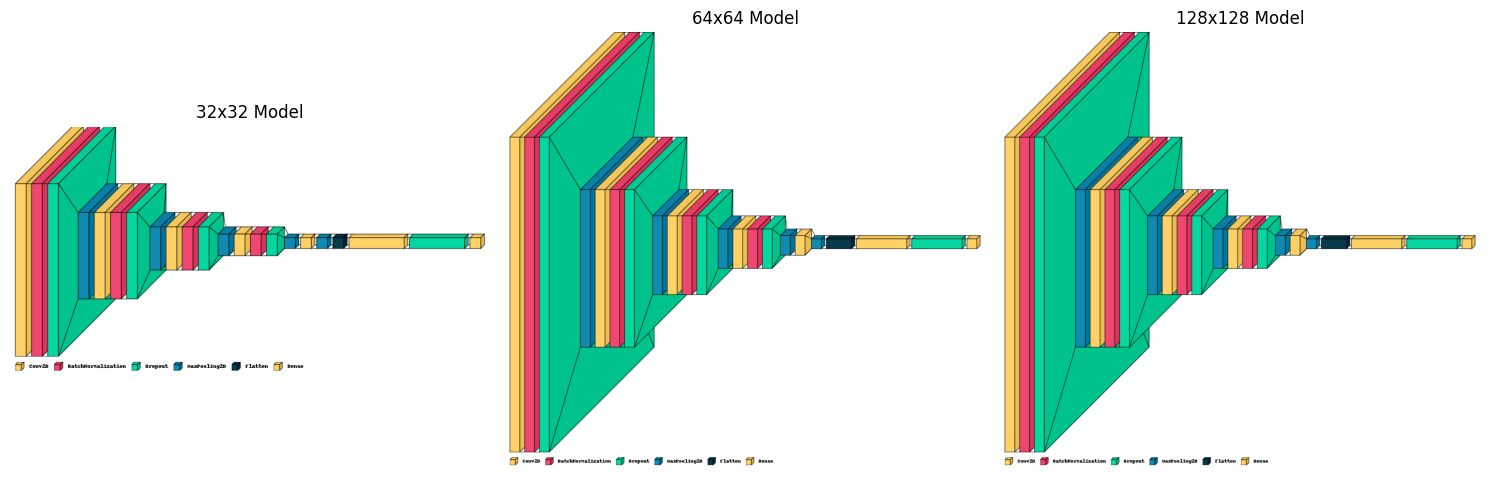

In [ ]:
import matplotlib.pyplot as plt
import visualkeras

# Generating visualization for each model
image_32x32 = visualkeras.layered_view(model_32x32, scale_xy=10, legend=True)
image_64x64 = visualkeras.layered_view(model_64x64, scale_xy=10, legend=True)
image_128x128 = visualkeras.layered_view(model_128x128, scale_xy=10, legend=True)

# Using matplotlib to display them side by side
plt.figure(figsize=(15, 5))

# Displaying the 32x32 model
plt.subplot(1, 3, 1)
plt.imshow(image_32x32)
plt.axis('off')
plt.title("32x32 Model")

# Displaying the 64x64 model
plt.subplot(1, 3, 2)
plt.imshow(image_64x64)
plt.axis('off')
plt.title("64x64 Model")

# Displaying the 256x256 model
plt.subplot(1, 3, 3)
plt.imshow(image_128x128)
plt.axis('off')
plt.title("128x128 Model")

plt.tight_layout()
plt.show()

# 16. 이미지 크기별 정확도와 손실 학습률 시각화

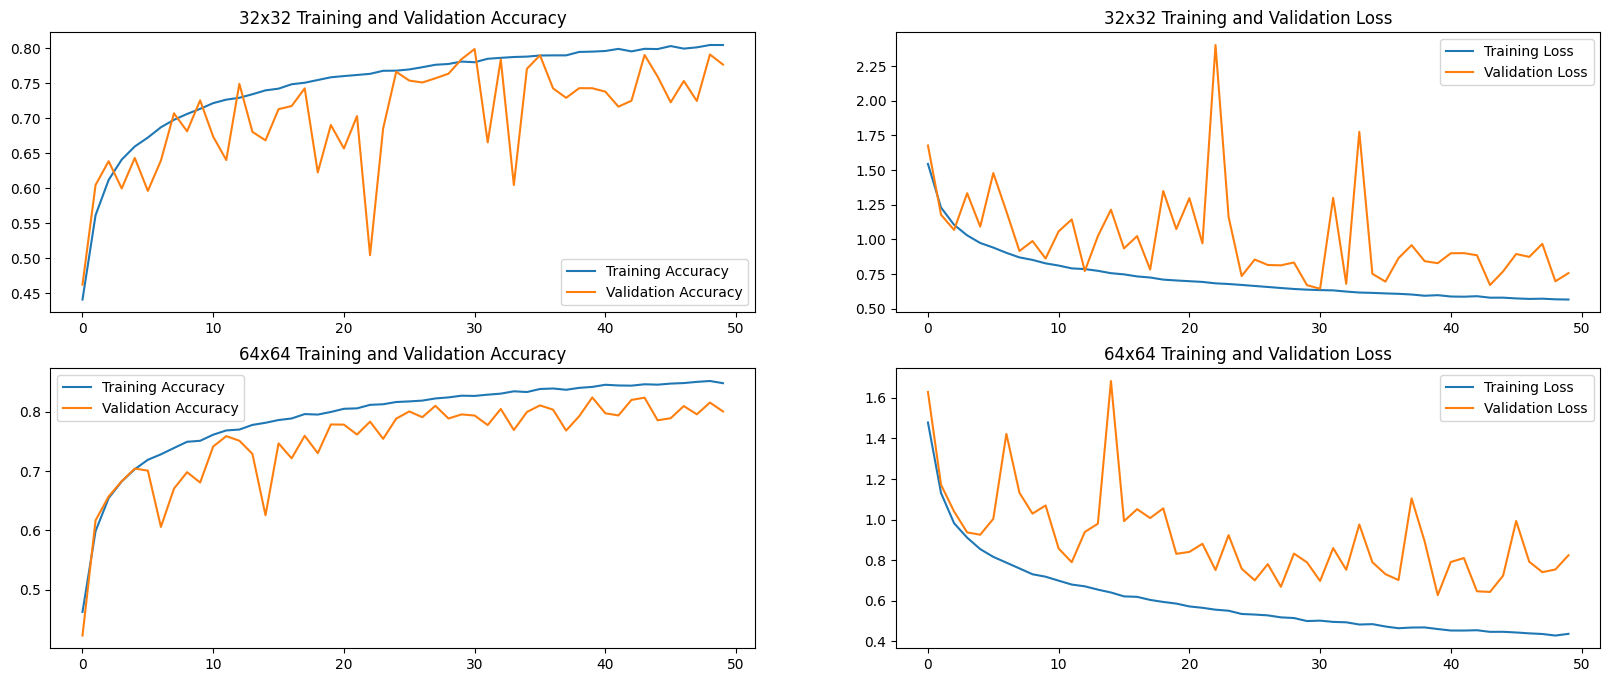

In [ ]:
def plot_history(history1, history2):
    plt.figure(figsize=(15, 8))

    # 32x32 Training and Validation Accuracy
    plt.subplot(2, 2, 1)
    plt.plot(history1.history['accuracy'], label='Training Accuracy')
    plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title('32x32 Training and Validation Accuracy')

    # 32x32 Training and Validation Loss
    plt.subplot(2, 2, 2)
    plt.plot(history1.history['loss'], label='Training Loss')
    plt.plot(history1.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title('32x32 Training and Validation Loss')

    # 64x64 Training and Validation Accuracy
    plt.subplot(2, 2, 3)
    plt.plot(history2.history['accuracy'], label='Training Accuracy')
    plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title('64x64 Training and Validation Accuracy')

    # 64x64 Training and Validation Loss
    plt.subplot(2, 2, 4)
    plt.plot(history2.history['loss'], label='Training Loss')
    plt.plot(history2.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title('64x64 Training and Validation Loss')\

    # # 128x128 Training and Validation Accuracy
    # plt.subplot(2, 2, 5)
    # plt.plot(history3.history['accuracy'], label='Training Accuracy')
    # plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
    # plt.legend()
    # plt.title('128x128 Training and Validation Accuracy')

    # # 128x128 Training and Validation Loss
    # plt.subplot(2, 2, 6)
    # plt.plot(history3.history['loss'], label='Training Loss')
    # plt.plot(history3.history['val_loss'], label='Validation Loss')
    # plt.legend()
    # plt.title('128x128 Training and Validation Loss')

    plt.show()

# 모델 학습 이후에 이 함수를 호출
plot_history(history1, history2,history3)

# 17. 혼동행렬 비교 시각화

313/313 [==============================] - 1s 3ms/step


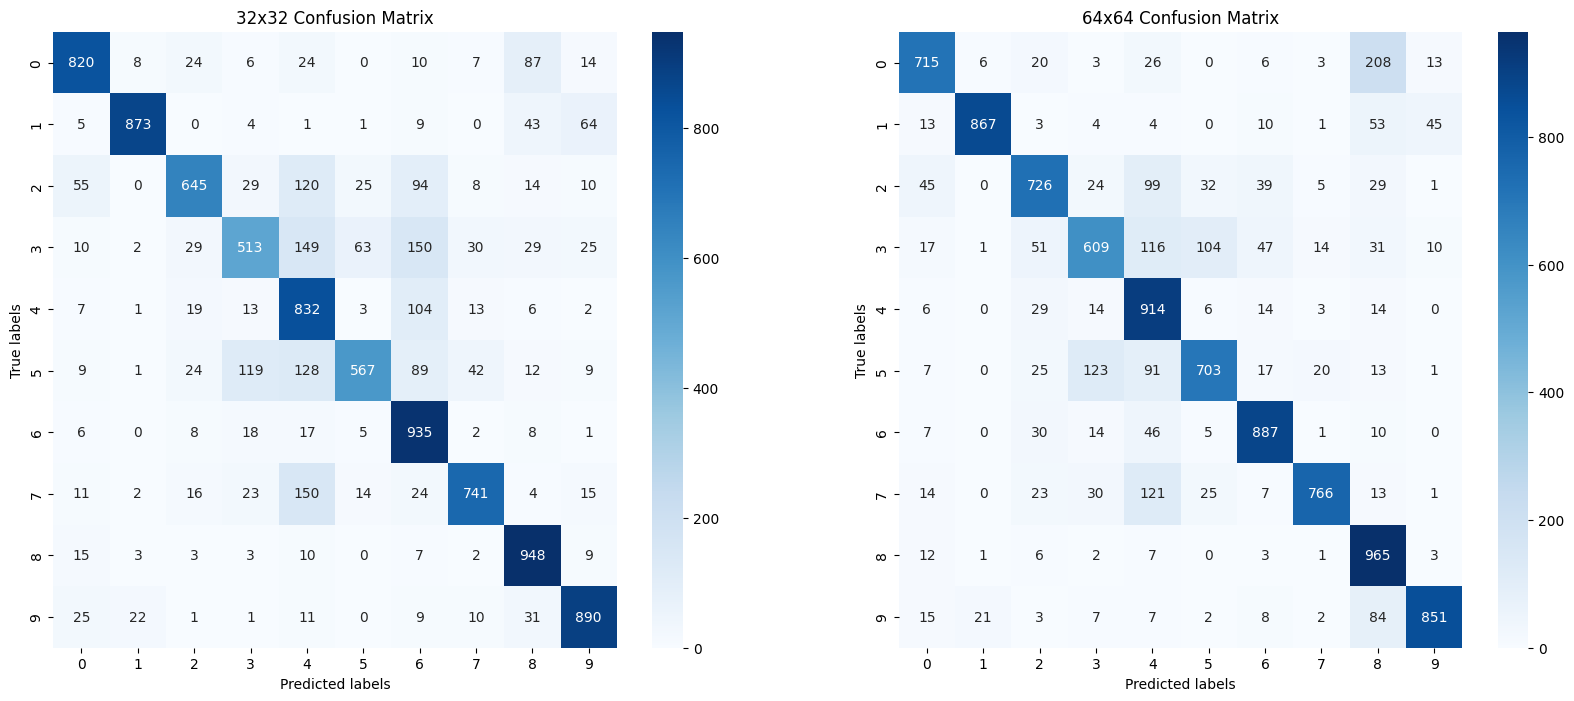

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


def plot_confusion_matrix(model, images, labels, title):
    # 모델을 사용하여 검증 데이터셋의 이미지에 대한 클래스 예측을 수행합니다.
    predicted_classes = np.argmax(model.predict(images), axis=-1)

    # 원-핫 인코딩된 레이블에서 클래스 인덱스를 추출합니다.
    true_classes = np.argmax(labels, axis=1)

    # 실제 레이블과 예측 레이블 간의 혼동 행렬을 계산합니다.
    cm = confusion_matrix(true_classes, predicted_classes)

    # 혼동 행렬을 시각화합니다.
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(title)

plt.figure(figsize=(20, 8))

# 32x32 이미지에 대한 혼동 행렬
plt.subplot(1, 2, 1)
plot_confusion_matrix(model_32x32, val_images, val_label, '32x32 Confusion Matrix')

# 64x64 이미지에 대한 혼동 행렬
plt.subplot(1, 2, 2)
plot_confusion_matrix(model_64x64, val_images_upscaled, val_label, '64x64 Confusion Matrix')

plt.subplot(1, 2, 3)
plot_confusion_matrix(model_128x128, val_images_upscaled, val_label, '128x128 Confusion Matrix')

plt.show()

# 18. 전체 레이블에서 예측 실패한 이미지 확인

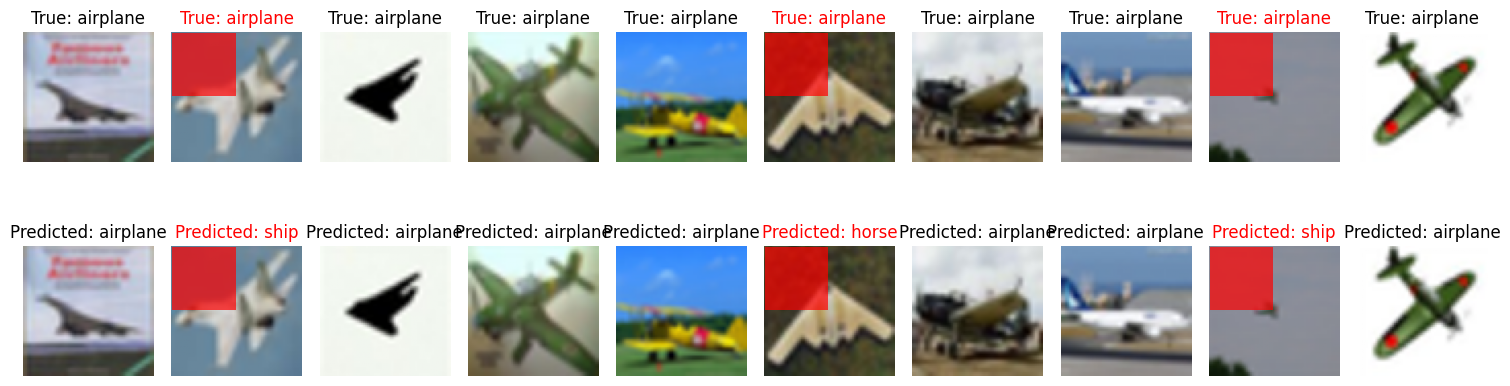

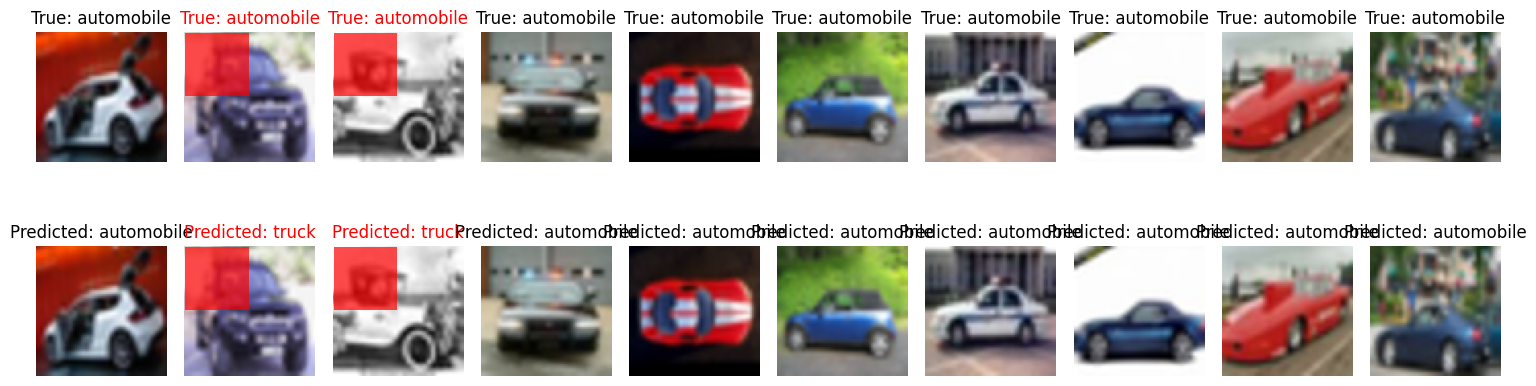

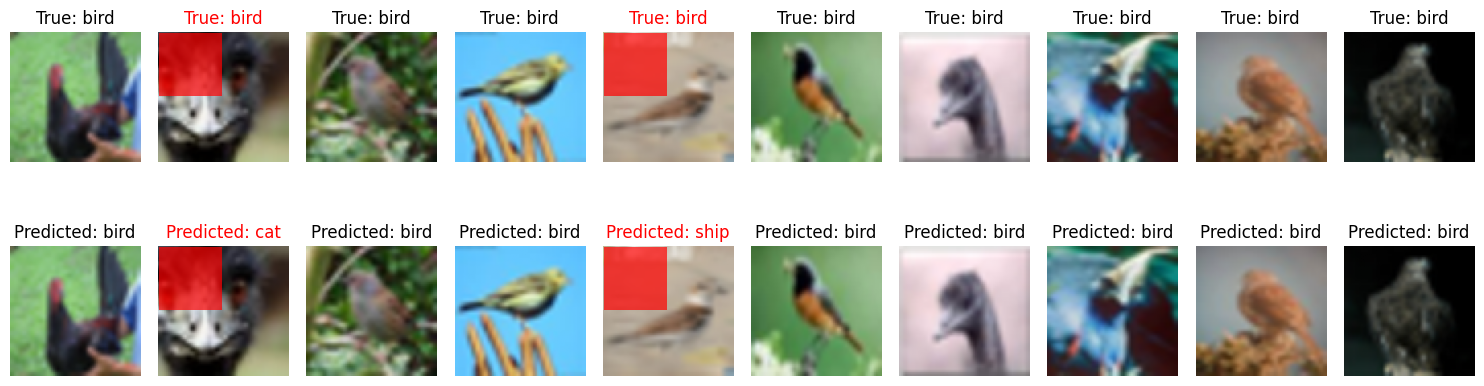

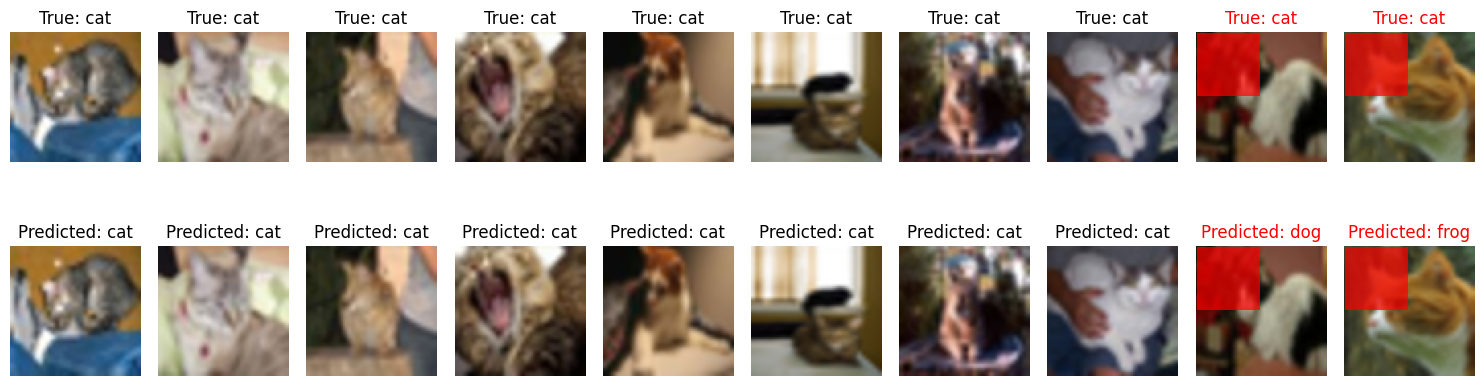

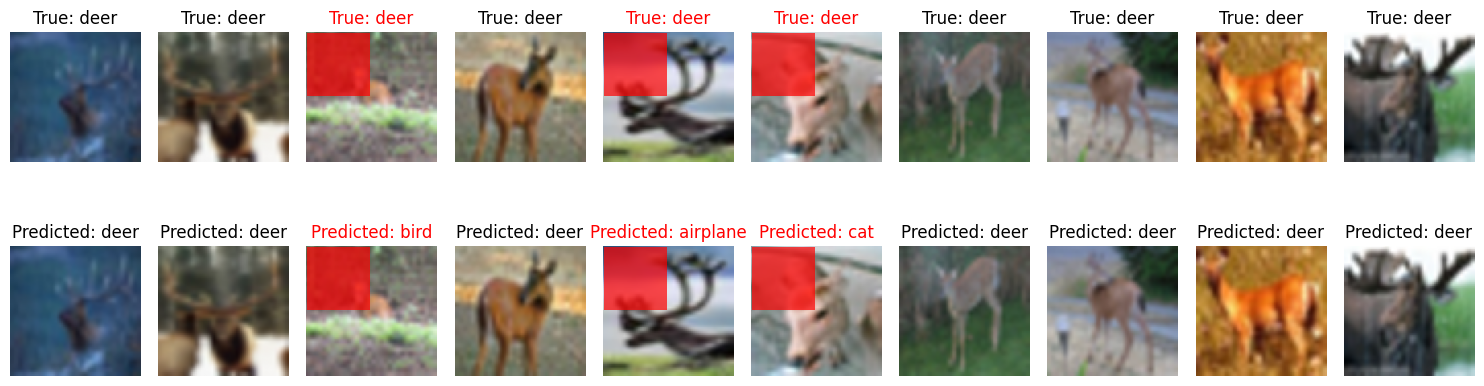

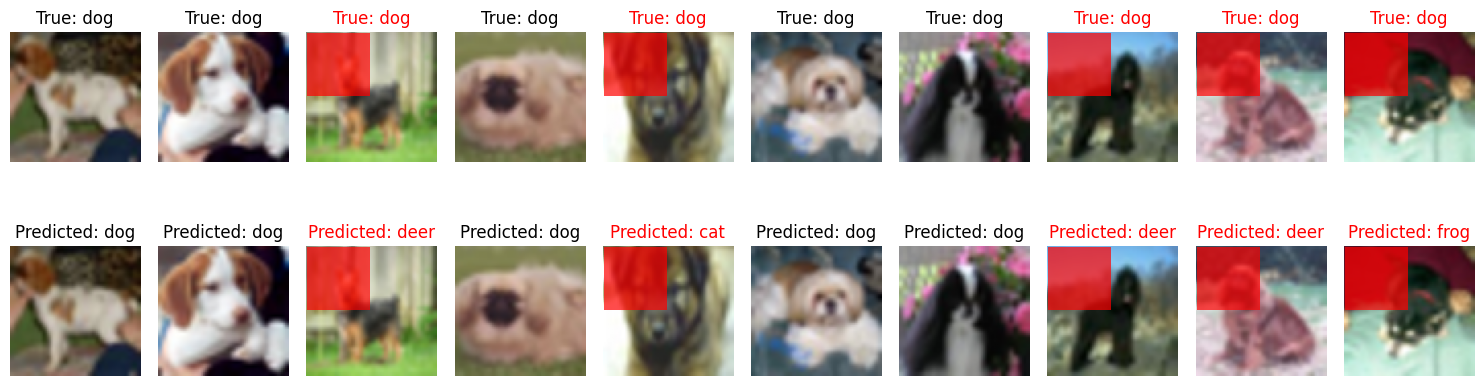

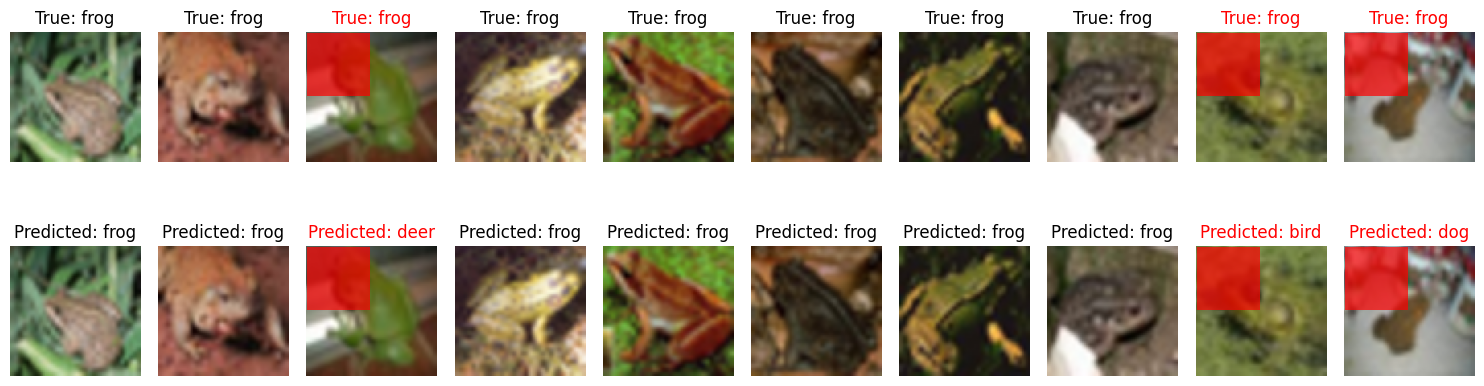

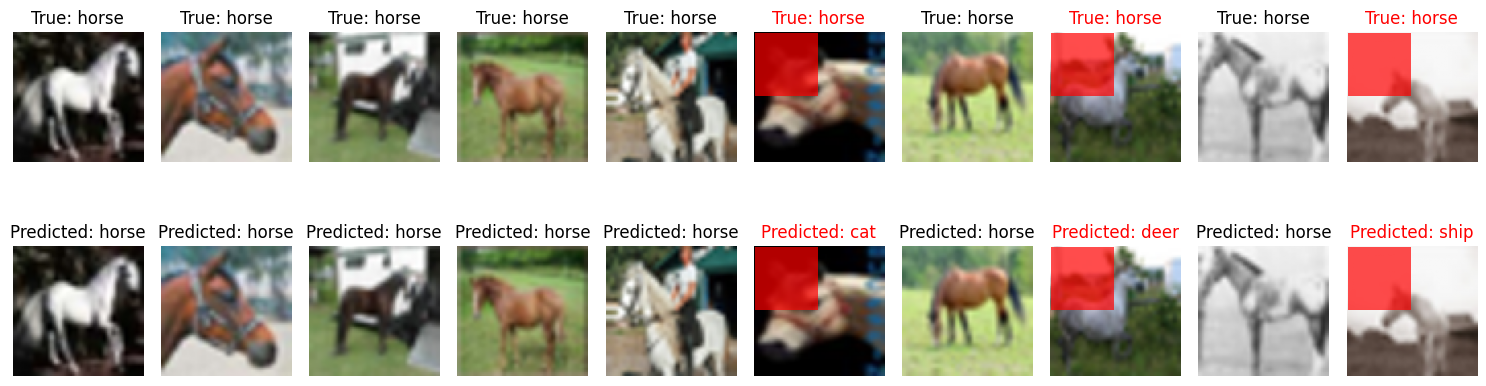

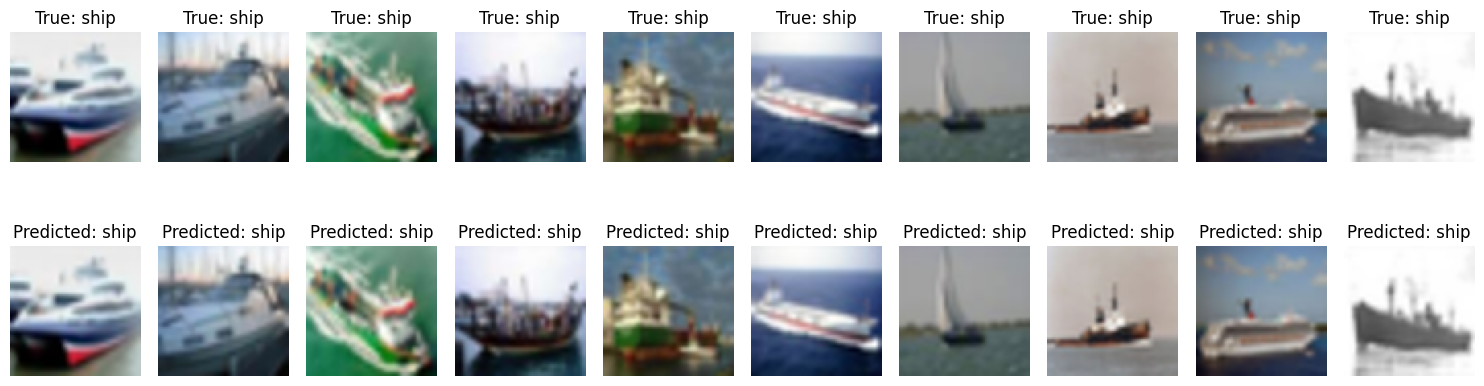

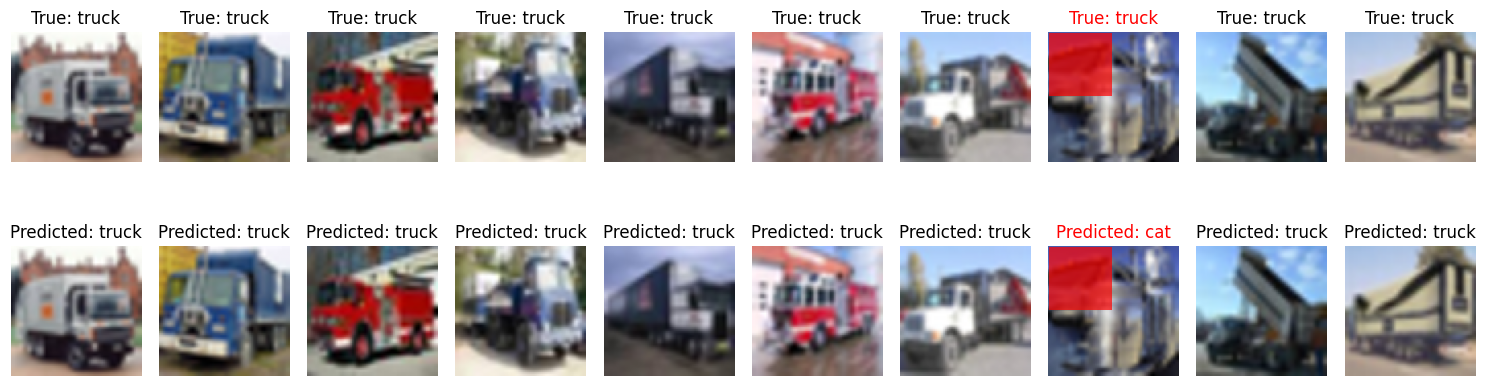

In [ ]:
def plot_labelwise_true_and_predicted(images, true_labels, predicted_labels, class_names, num_per_label=10):
    for label in range(len(class_names)):
        indices = np.where(np.argmax(true_labels, axis=1) == label)[0]
        num_to_plot = min(num_per_label, len(indices))

        plt.figure(figsize=(15, 5))
        for i in range(num_to_plot):
            idx = indices[i]
            correct_prediction = np.argmax(true_labels[idx]) == predicted_labels[idx]

            plt.subplot(2, num_per_label, i+1)
            plt.imshow(images[idx])
            if not correct_prediction:
                plt.gca().add_patch(plt.Rectangle((0, 0), 31, 31, edgecolor="none", facecolor="red", alpha=0.7))
                title_color = 'red'
            else:
                title_color = 'black'
            plt.title(f"True: {class_names[np.argmax(true_labels[idx])]}", color=title_color)
            plt.axis('off')

            plt.subplot(2, num_per_label, num_per_label + i + 1)
            plt.imshow(images[idx])
            if not correct_prediction:
                plt.gca().add_patch(plt.Rectangle((0, 0), 31, 31, edgecolor="none", facecolor="red", alpha=0.7))
                title_color = 'red'
            else:
                title_color = 'black'
            plt.title(f"Predicted: {class_names[predicted_labels[idx]]}", color=title_color)
            plt.axis('off')

        plt.tight_layout()
        plt.show()

plot_labelwise_true_and_predicted(val_images_upscaled, val_label, predicted_classes, class_names)


# 19. 예측 실패한 이미지 30개 추출

313/313 [==============================] - 1s 3ms/step


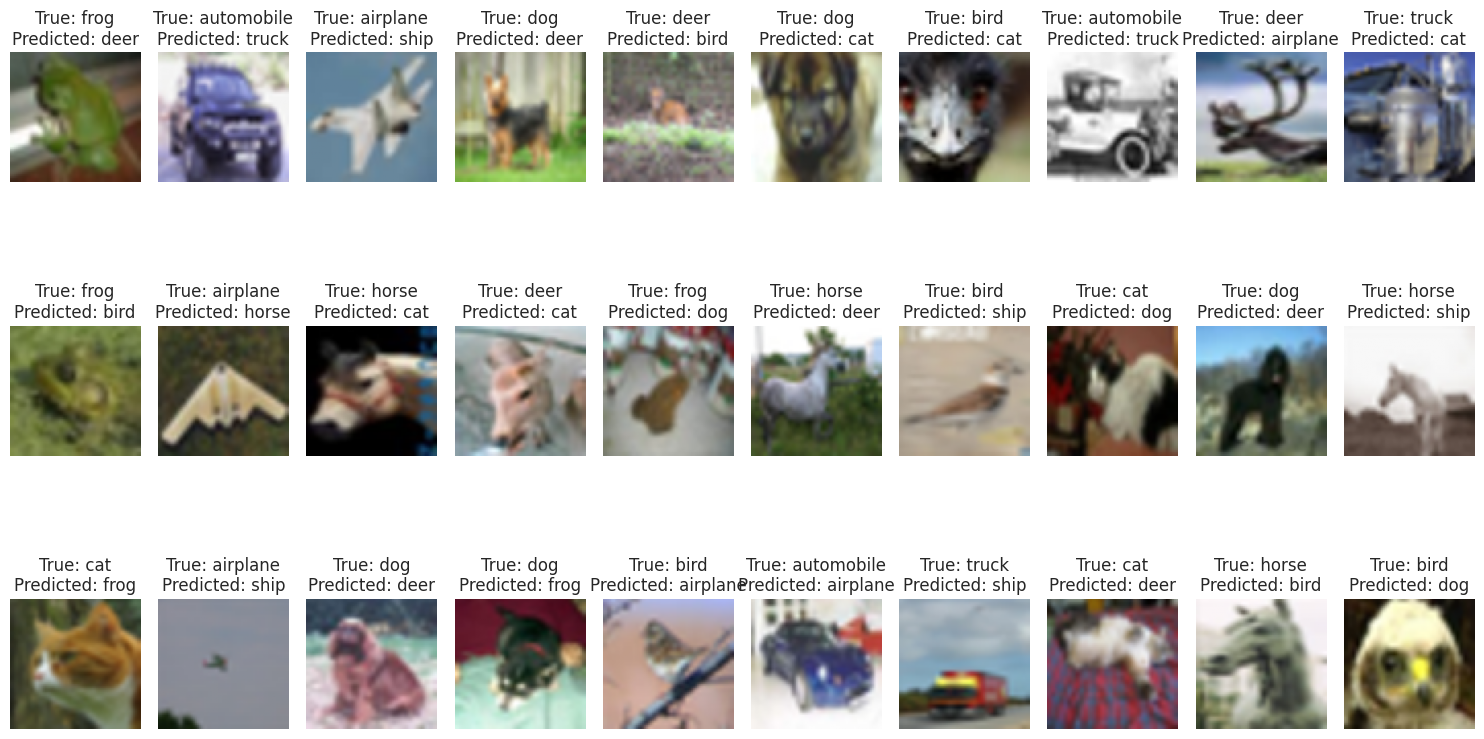

In [ ]:
def plot_labelwise_true_and_predicted(images, true_labels, predicted_labels, class_names, num_per_label=10):
    for label in range(len(class_names)):
        indices = np.where(np.argmax(true_labels, axis=1) == label)[0]
        num_to_plot = min(num_per_label, len(indices))

        plt.figure(figsize=(15, 5))
        for i in range(num_to_plot):
            idx = indices[i]

            correct_prediction = np.argmax(true_labels[idx]) == predicted_labels[idx]

            plt.subplot(2, num_per_label, i+1)
            if not correct_prediction:
                plt.gca().add_patch(plt.Rectangle((0,0),31,31, edgecolor="none", facecolor="red", alpha=0.3))
            plt.imshow(images[idx])
            plt.title(f"True: {class_names[label]}")
            plt.axis('off')

            plt.subplot(2, num_per_label, num_per_label + i+1)
            if not correct_prediction:
                plt.gca().add_patch(plt.Rectangle((0,0),31,31, edgecolor="none", facecolor="red", alpha=0.3))
            plt.imshow(images[idx])
            plt.title(f"Predicted: {class_names[predicted_labels[idx]]}")
            plt.axis('off')

        plt.tight_layout()
        plt.show()

plot_labelwise_true_and_predicted(val_images_upscaled, val_label, predicted_classes, class_names)
